In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
from functools import reduce

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-power-generation/TenneTTSO.csv
/kaggle/input/wind-power-generation/50Hertz.csv
/kaggle/input/wind-power-generation/TransnetBW.csv
/kaggle/input/wind-power-generation/Amprion.csv


##### Reading csv files for all the companies

In [58]:
tenet = pd.read_csv('/kaggle/input/wind-power-generation/TenneTTSO.csv')
hertz = pd.read_csv('/kaggle/input/wind-power-generation/50Hertz.csv')
transnet = pd.read_csv('/kaggle/input/wind-power-generation/TransnetBW.csv')
amprion = pd.read_csv('/kaggle/input/wind-power-generation/Amprion.csv')

##### Observing the sample data of all the companies

In [59]:
tenet.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,9.68,10.16,10.94,11.39,12.09,12.79,13.33,13.88,14.73,...,73.52,74.03,74.77,73.32,74.83,73.10,71.26,71.95,69.97,69.58
1,24/08/2019,67.94,67.52,64.48,64.78,65.75,65.07,63.39,63.69,64.37,...,116.79,114.30,110.81,109.76,106.55,102.31,99.04,96.57,94.75,91.73
2,25/08/2019,89.38,88.95,85.13,82.74,81.46,77.92,75.58,72.94,70.41,...,50.02,48.04,45.45,43.04,41.25,39.36,37.60,35.46,34.00,33.47
3,26/08/2019,33.71,31.84,32.75,33.33,32.02,30.97,29.97,28.47,25.92,...,71.72,69.34,67.46,65.91,64.29,62.16,57.53,58.15,55.76,54.34
4,27/08/2019,52.65,47.95,44.61,43.80,41.00,41.23,41.07,39.49,36.93,...,54.66,54.82,55.75,54.94,56.00,56.02,55.51,55.96,56.48,55.19


In [60]:
hertz.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,74,73,63,55,54,53,51,52,45,...,68,68,63,61,57,52,51,49,45,40
1,24/08/2019,37,38,35,35,31,32,30,29,28,...,118,118,112,107,104,104,99,95,95,96
2,25/08/2019,93,88,85,81,76,80,81,76,73,...,111,108,103,96,93,88,86,82,80,77
3,26/08/2019,72,66,59,54,48,46,45,43,42,...,48,47,47,46,47,49,50,51,48,42
4,27/08/2019,39,38,36,36,34,31,31,30,31,...,54,53,51,52,51,52,54,54,56,59


In [61]:
transnet.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,1.44,1.38,1.38,1.50,1.77,1.87,1.95,2.47,2.68,...,21.99,18.33,18.56,18.56,17.11,14.19,15.69,16.71,18.88,21.67
1,24/08/2019,22.43,22.25,22.03,23.34,24.81,22.90,22.77,19.49,22.58,...,1.67,1.35,1.34,0.97,1.41,1.50,1.30,1.23,1.15,1.01
2,25/08/2019,0.75,1.06,0.72,1.00,0.80,0.95,0.66,0.84,0.84,...,1.96,1.61,1.39,0.93,0.60,0.41,0.56,0.36,0.23,0.19
3,26/08/2019,0.56,0.85,0.56,0.40,0.46,0.39,0.34,0.19,0.28,...,5.10,5.25,5.47,4.10,4.89,4.27,3.16,2.75,1.66,1.39
4,27/08/2019,1.08,1.02,0.98,0.84,0.57,0.46,0.28,0.15,0.12,...,11.25,11.60,11.66,12.43,11.17,9.35,11.21,13.26,12.63,13.20


In [62]:
amprion.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,5,5,6,7,6,5,5,5,5,...,72,69,66,67,66,69,68,65,61,64
1,24/08/2019,62,60,55,55,54,52,51,50,49,...,34,33,31,31,31,31,31,31,27,28
2,25/08/2019,29,29,29,30,28,27,28,26,22,...,30,27,28,28,25,23,21,19,16,15
3,26/08/2019,13,12,12,11,12,12,12,10,10,...,21,22,22,22,23,23,24,25,24,23
4,27/08/2019,21,20,19,16,15,14,13,11,11,...,34,33,31,31,31,33,33,34,33,32


##### Converting the datasets into time series datasets in long format as currently they are in wide formats

In [63]:
def wide_to_long(df, varname):
    varname = varname
    df = pd.melt(df, id_vars = 'Date', var_name = 'Time', value_name = varname) #unpivot
    df['Dates'] = df['Date'].astype(str)+' '+df['Time'].astype(str)
    df['Dates'] = pd.to_datetime(df['Dates'], format ='%d/%m/%Y %H:%M:%S')
    df.drop(columns = ['Date','Time'], inplace = True)
    cols = ['Dates', varname]
    df = df[cols]
    df = df.set_index('Dates')
    df = df.sort_index()
    df.reset_index(drop=False, inplace = True)
    return df

tenet = wide_to_long(tenet, 'TenneTTSO')
hertz = wide_to_long(hertz, '50Hertz')
transnet = wide_to_long(transnet, 'TransnetBW')
amprion = wide_to_long(amprion, 'Amprion')

##### Printing some statistics

In [64]:
print(tenet.describe())
print(hertz.describe())
print(transnet.describe())
print(amprion.describe())

          TenneTTSO
count  38112.000000
mean     146.705854
std      144.065379
min        0.000000
25%       42.287500
50%       93.330000
75%      206.842500
max      727.440000
            50Hertz
count  38112.000000
mean     143.607788
std      138.068975
min        0.000000
25%       43.000000
50%       96.000000
75%      199.000000
max      725.000000
         TransnetBW
count  38112.000000
mean      30.145426
std       35.860767
min        0.000000
25%        5.430000
50%       16.440000
75%       43.815000
max     1506.780000
            Amprion
count  38112.000000
mean      97.769574
std       97.199843
min        0.000000
25%       23.000000
50%       62.000000
75%      144.000000
max      463.000000


##### Merging all the dataframes into a single frame

* **Didn't use map function because we need a single dataframe which is a combination of individual dataframes. With map, it cannot return a single element with an array of multiple elements whereas with reduce it will always return the accumulator. In map, you iterate the elements, and for each element you return an element you want.**

In [65]:
dfs = [tenet,hertz,transnet,amprion]
wind_df = reduce(lambda left,right: pd.merge(left,right, on ='Dates', how ='outer'),dfs)
wind_df

,Dates,TenneTTSO,50Hertz,TransnetBW,Amprion
0,2019-08-23 00:00:00,9.68,74,1.44,5
1,2019-08-23 00:15:00,10.16,73,1.38,5
2,2019-08-23 00:30:00,10.94,63,1.38,6
3,2019-08-23 00:45:00,11.39,55,1.50,7
4,2019-08-23 01:00:00,12.09,54,1.77,6
...,...,...,...,...,...
38107,2020-09-22 22:45:00,11.76,75,9.78,12
38108,2020-09-22 23:00:00,13.18,72,10.00,12
38109,2020-09-22 23:15:00,14.32,71,11.78,13
38110,2020-09-22 23:30:00,15.54,69,12.75,13


##### Resampling the dataset on monthly basis

In [66]:
wind_df_M = wind_df.resample('M', on ='Dates').mean()
wind_df_M

,TenneTTSO,50Hertz,TransnetBW,Amprion
Dates,,,,
2019-08-31,39.579491,47.189815,5.991597,24.111111
2019-09-30,123.848076,123.309722,26.265677,79.705208
2019-10-31,156.926401,141.315188,37.642053,125.918347
2019-11-30,132.471434,130.964931,31.732840,92.237153
2019-12-31,202.267997,192.162634,52.914204,143.209677
2020-01-31,227.523673,228.858871,42.730017,153.387769
2020-02-29,369.215815,337.136135,68.100521,235.062141
2020-03-31,204.421794,184.721774,46.309284,135.522513
2020-04-30,119.507469,121.488542,22.128003,67.316667


<Figure size 1080x864 with 0 Axes>

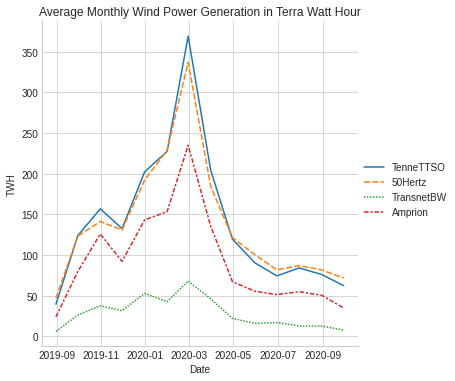

In [67]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize =(15,12))
sns.relplot(data = wind_df_M, kind ='line')

plt.title('Average Monthly Wind Power Generation in Terra Watt Hour')
plt.xlabel('Date')
plt.ylabel('TWH')
plt.show()

**We can clealry see from the above graph that TenneTTSo has the highest average monthly wind generation. We can also observe that the power generation trend almost remains same for all the companies which starts to peak around in the months november to december. Then starting from January the graphs gradually increases and attains its peaks in the month of March. Clearly, it is because of the fact that these following months are the most windy in germany as is specified by the google.**

##### Resampling the data on daily basis

In [68]:
wind_df_D = wind_df.resample('D', on = 'Dates').mean()
wind_df_D.head()

,TenneTTSO,50Hertz,TransnetBW,Amprion
Dates,,,,
2019-08-23,27.664167,30.718750,13.457708,23.562500
2019-08-24,68.409688,61.916667,6.879896,32.885417
2019-08-25,36.475312,76.656250,0.798229,14.854167
2019-08-26,35.445521,40.416667,1.813750,12.447917
2019-08-27,34.862083,46.458333,2.910312,15.520833


<Figure size 1080x864 with 0 Axes>

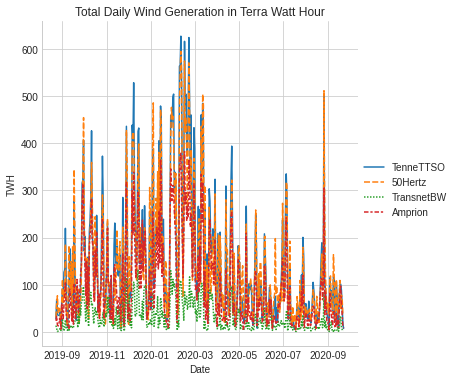

In [69]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize =(15,12))
sns.relplot(data = wind_df_D, kind ='line')

plt.title('Total Daily Wind Generation in Terra Watt Hour')
plt.xlabel('Date')
plt.ylabel('TWH')
plt.show()

##### Smoothing the curve by calculating the moving average

<Figure size 1080x864 with 0 Axes>

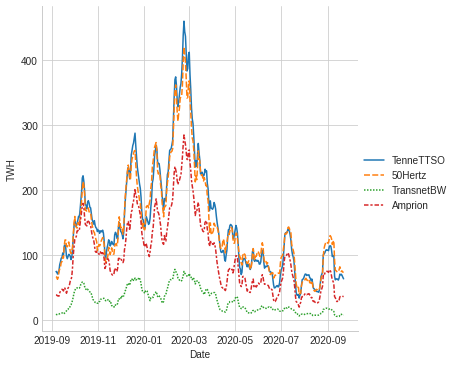

In [70]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize =(15,12))
sns.relplot(data = wind_df_D.rolling(15).mean(), kind ='line')

plt.xlabel('Date')
plt.ylabel('TWH')
plt.show()

##### Categorizing the data based on different seasons

*In Germany spring is during the months of March, April and May. Summer is from June through to August. Autumn is during the months of September, October and November and winter is from December to February.*

In [71]:
wind_df_D

,TenneTTSO,50Hertz,TransnetBW,Amprion
Dates,,,,
2019-08-23,27.664167,30.718750,13.457708,23.562500
2019-08-24,68.409688,61.916667,6.879896,32.885417
2019-08-25,36.475312,76.656250,0.798229,14.854167
2019-08-26,35.445521,40.416667,1.813750,12.447917
2019-08-27,34.862083,46.458333,2.910312,15.520833
...,...,...,...,...
2020-09-18,101.122604,48.114583,31.756563,97.312500
2020-09-19,88.397292,78.343750,10.759062,60.208333
2020-09-20,58.745833,70.364583,5.176354,37.562500


In [72]:
wind_df_D.reset_index(inplace = True)
wind_df_D['Month'] = wind_df_D['Dates'].dt.month
wind_df_D['Day_of_week'] = wind_df_D['Dates'].dt.day_name()

seasons = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Autumun','Autumun','Autumun','Winter']
monthSeason = dict(zip(range(1,13),seasons))
wind_df_D['Season'] = wind_df_D['Month'].map(monthSeason)
wind_df_D.head()

,Dates,TenneTTSO,50Hertz,TransnetBW,Amprion,Month,Day_of_week,Season
0,2019-08-23,27.664167,30.718750,13.457708,23.562500,8,Friday,Summer
1,2019-08-24,68.409688,61.916667,6.879896,32.885417,8,Saturday,Summer
2,2019-08-25,36.475312,76.656250,0.798229,14.854167,8,Sunday,Summer
3,2019-08-26,35.445521,40.416667,1.813750,12.447917,8,Monday,Summer
4,2019-08-27,34.862083,46.458333,2.910312,15.520833,8,Tuesday,Summer


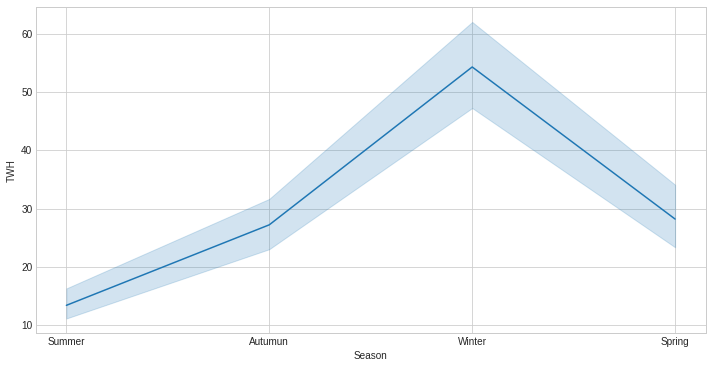

In [73]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize =(12,6))
sns.lineplot(x = 'Season', y = 'TransnetBW', data = wind_df_D)

plt.xlabel('Season')
plt.ylabel('TWH')
plt.show()